In [18]:
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
import math
from math import sqrt 
from math import pi
from math import e
from scipy.optimize import root
import time

import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

from image_df_2048 import image_df_2048

from astropy.constants import au, R_sun
transunit = ((au/R_sun).value)**2 / 1000

## load image pixel info

In [2]:
angle_point_num_alpha = 61
offaxis_angle_x_alpha = np.linspace(-math.pi /
                                    360, math.pi/360, angle_point_num_alpha)
offaxis_angle_y_alpha = np.zeros(angle_point_num_alpha)

In [6]:
# for i in range(angle_point_num_alpha):
df=image_df_2048(30)
df

,integral_area,central_wavelength,stddev
0,3.237026,0.037211,0.042466
1,3.237026,0.037227,0.042466
2,3.237026,0.037243,0.042466
3,3.237026,0.037248,0.042466
4,6.474051,0.037306,0.042466
...,...,...,...
3739732,6.474051,0.037865,0.042466
3739733,3.237026,0.037887,0.042466
3739734,6.474051,0.037898,0.042466
3739735,3.237026,0.037948,0.042466


## read dataframe

In [5]:
df.iloc[10]

Unnamed: 0            10.000000
integral_area          3.237026
central_wavelength     0.037374
stddev                 0.042466
Name: 10, dtype: float64

In [53]:
df.iloc[10]['integral_area']

3.237025633647092

In [54]:
df.index.stop

3739737

In [4]:
pixel_num=df.index.stop

# solve 2 equation

In [19]:
def equations(p,A_i,mu_i,sigma_i):
    mu ,sigma= p

    eq1=0 
    eq2=0
    
    exp_i = np.exp(-(mu - mu_i) ** 2 / (2 * (sigma ** 2 + sigma_i ** 2)))

    eq1 = np.sum(A_i * exp_i * (1 / np.sqrt(sigma ** 2 + sigma_i ** 2) - 2 * (sigma ** 2 * (mu - mu_i) ** 2 + sigma ** 2 * sigma_i ** 2 + sigma_i ** 4) / (sigma ** 2 + sigma_i ** 2) ** 2.5))
    eq2 = np.sum(A_i * (mu_i - mu) * exp_i / ((sigma_i ** 2 + sigma ** 2) ** (3 / 2)))

    # print(eq1,eq2,mu ,sigma)
   
    return [eq1, eq2]

In [38]:
start = time.time()

test_num=angle_point_num_alpha
sol=np.zeros((test_num,2))
# for i in range(angle_point_num_alpha):
for i in range(test_num):
    df=image_df_2048(i)
    A_i=df.iloc[:]["integral_area"]
    mu_i=df.iloc[:]["central_wavelength"]
    sigma_i=df.iloc[:]["stddev"]
    sol[i]=fsolve(equations,x0=(19.8*transunit*offaxis_angle_x_alpha[i]**2+0.004,0.042),
                      args=(A_i,mu_i,sigma_i,),maxfev=20)
    print(str(offaxis_angle_x_alpha[i]*180*60/math.pi)+" arcmin:   finished")
    print(sol[i])
    print()

end = time.time()
totol_time = end - start
print(totol_time)

-29.999999999999996 arcmin:   finished
[0.07208606 0.05897544]

-29.0 arcmin:   finished
[0.06764966 0.05797169]

-28.0 arcmin:   finished
[0.06336902 0.05699364]

-27.000000000000004 arcmin:   finished
[0.05924387 0.05604223]

-25.999999999999996 arcmin:   finished
[0.05527392 0.05511841]

-25.0 arcmin:   finished
[0.05145884 0.05422307]

-24.0 arcmin:   finished
[0.0477983 0.0533571]

-23.0 arcmin:   finished
[0.04429195 0.05252133]

-21.999999999999996 arcmin:   finished
[0.0409394  0.05171658]

-21.0 arcmin:   finished
[0.03774027 0.05094362]

-19.999999999999996 arcmin:   finished
[0.03469417 0.05020315]

-19.0 arcmin:   finished
[0.03180068 0.04949584]

-18.000000000000004 arcmin:   finished
[0.02905941 0.04882231]

-17.000000000000004 arcmin:   finished
[0.02646993 0.04818312]

-16.0 arcmin:   finished
[0.02403185 0.04757876]

-14.999999999999998 arcmin:   finished
[0.02174476 0.04700969]

-14.0 arcmin:   finished
[0.01960828 0.0464763 ]

-13.000000000000002 arcmin:   finished
[

### visualization

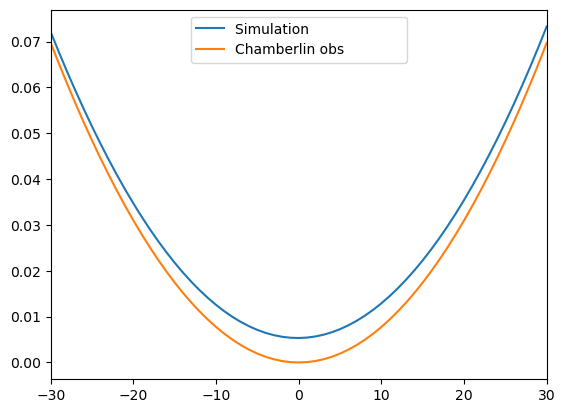

In [39]:
fig, ax = plt.subplots()

ax.plot(offaxis_angle_x_alpha[:test_num]*180*60/pi,sol[:,0],label="Simulation                     ")
ax.set_xlim(-30,30)
ax.plot(offaxis_angle_x_alpha[:test_num]*180*60/pi,19.8*transunit*offaxis_angle_x_alpha[:test_num]**2,
        label="Chamberlin obs")
ax.legend()

### draft

In [69]:
def equations(p,A_i,mu_i,simga_i):
    mu ,sigma= p

    eq1=0 
    eq2=0
           
    for i in range(300000):
        
        
        
        exp_i=e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) 
        
        eq1=eq1+A_i* exp_i *(1/sqrt(sigma**2+sigma_i**2)-2*(sigma**2*(mu-mu_i)**2+sigma**2*sigma_i**2+sigma_i**4)\
                             /(sigma**2+sigma_i**2)**2.5)
        
        
        eq2=eq2+A_i   *        (mu_i-mu)   *     exp_i \
                /(   (sigma_i**2+sigma**2)**(3/2)  )  # right
          
    print(eq1,eq2)
   
    return [eq1, eq2]

In [ ]:
A_i=df.iloc[i]["integral_area"]
mu_i=df.iloc[i]["central_wavelength"]
sigma_i=df.iloc[i]["stddev"]

# full: 3 equations

In [9]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
df_test

,amplitude,central_wavelength,stddev
0,1,3,1
1,2,2,2


In [10]:
def equations(p,test_A,test_central,test_stddev,j):
    A, mu ,sigma= p

    eq1=A/(2*sqrt(pi)*sigma)   
    eq2=0
    eq3=A*sigma/(4*sqrt(pi))  
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
    
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        eq1=eq1-A_i *     e**(  -(mu_i-mu)**2/(2*(sigma_i**2+sigma**2))  )    \
        /(  sqrt(2*pi*(sigma_i**2+sigma**2) )  )
        
        eq2=eq2-A_i*        (mu_i-mu)*(sigma**2)   * e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) \
                /(   sqrt(2*pi)*(sigma_i**2+sigma**2)**(3/2)  )
        
        eq3=eq3-A_i  * (sigma**2)*  ((mu_i-mu)**2 *(sigma**2) + (sigma**2)*(sigma_i**2) +  sigma_i**4  )* \
        e**(-(mu_i-mu)**2/(2*(sigma_i**2+sigma**2)))    /(  sqrt(2*pi)*(sigma**2+sigma_i**2)**(2.5)  )
    
    print(eq1,eq2,eq3)
   
    # print(A, mu ,sigma)
    return [eq1, eq2, eq3]

In [11]:
# pixel_num=df.index.stop
i=1
A, mu ,sigma = fsolve(equations,x0=(2.73541282,2.34814,1.8034931,),xtol=1e-10,maxfev=50,
                      args=(test_A,test_central,test_stddev,i))
print("result")
print(A, mu ,sigma)



-0.04997586479743785 -0.04587936038885048 -0.02489366859097175
-0.04997586479743785 -0.04587936038885048 -0.02489366859097175
-0.04997586479743785 -0.04587936038885048 -0.02489366859097175
-0.049975858421800995 -0.04587936038885048 -0.02489365822231393
-0.049975865290989296 -0.0458793514225463 -0.024893665222698313
-0.049975867354603826 -0.04587935963806295 -0.02489366332493359
0.011769031024386256 -0.0016477346392533149 -0.0002281456670641946
-0.002550169625127774 0.00034942288803245514 -0.0014253731419960891
-0.0002505532075443573 4.0607676115925195e-05 -0.00022939759755957745
-1.0371575573098202e-05 2.8962662698001074e-06 -1.3987572196227926e-05
-4.813959447735883e-07 1.2507736077416176e-07 -4.798027379848691e-07
1.4779336365844387e-08 -3.6436266920292226e-09 1.829257928465111e-08
3.2448688180863883e-10 -7.825931569449551e-11 4.381844886935937e-10
3.2236435743016045e-12 -7.787936961989317e-13 4.325650948544535e-12
-2.1649348980190553e-15 5.689893001203927e-16 -3.164135620181696e-15


<Gaussian1D(amplitude=0.71757523, mean=2.55208037, stddev=1.61606112)>

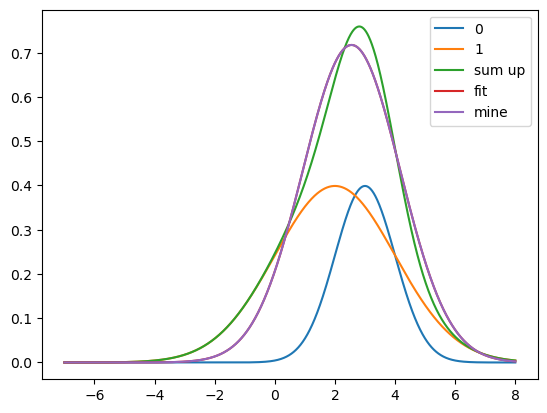

In [15]:
num=2
c=[]
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

wave_list=np.linspace(-7,8,2000)
for i in range(num):
    c.append(models.Gaussian1D(amplitude=test_A[i]/sqrt(2*pi*test_stddev[i]**2), mean=test_central[i], stddev=test_stddev[i]))
    
total=np.zeros_like(c[0](wave_list))

for i in range(num):
    total+=c[i](wave_list)
    
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()
    
for i in range(num):
    ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")
ax.plot(wave_list,models.Gaussian1D(amplitude=A/sqrt(2*pi*sigma**2), mean=mu, stddev=sigma)(wave_list),label="mine")

ax.legend()
c_fitted

Text(0.5, 0.5, 'central_wave')

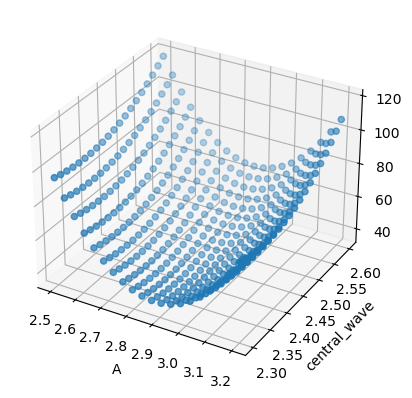

In [13]:
# fig, ax = plt.subplots()
A =np.linspace(2.5,3.2,20)
M=np.linspace(2.3,2.6,20)
error=np.zeros((20,20))
point=np.zeros((20,20,2))
for i in range(len(A)):
    for j in range(len(M)):
        error[i,j]=sum((models.Gaussian1D(amplitude=A[i], mean=M[j], stddev=1.61610393)(wave_list)-total)**2)
        point[i,j]=[A[i],M[j]]
            
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter3D(point[:,:,0],point[:,:,1],error,zdir='z')
ax.set_xlabel('A')
ax.set_ylabel('central_wave')

Text(0.5, 0, 'A')

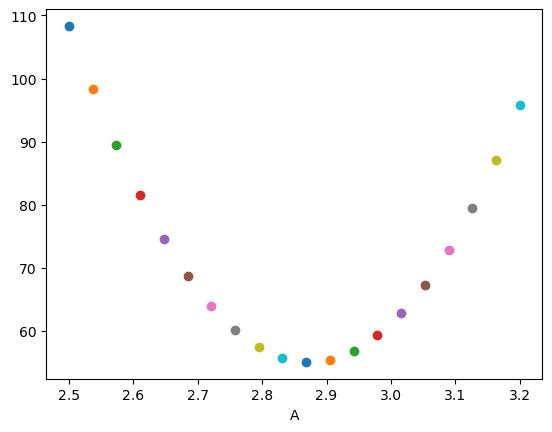

In [14]:
A =np.linspace(2.5,3.2,20)
fig, ax = plt.subplots()
for i in range(len(A)):
    ax.scatter(A[i],sum((models.Gaussian1D(amplitude=A[i], 
                                           mean=2.55208652926, stddev=1.61610393)(wave_list)-total)**2)     )
ax.set_xlabel("A")

In [17]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
df_test

,amplitude,central_wavelength,stddev
0,1,3,1
1,2,2,2


In [18]:

def equations(p,test_A,test_central,test_stddev,j):
    A, mu ,sigma= p
    j=1
    print(j)
    
    eq1=A/(2*sqrt(pi)*sigma)   
    eq2=0
    eq3=A/(4*sqrt(pi))  
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
    
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        

        
        eq1=eq1-A_i *     e**(  -(mu_i-mu)**2/(2*(sigma_i**2+sigma**2))  )    \
        /(  sqrt(2*pi*(sigma_i**2+sigma**2) )  )
        
        
        
        eq2=eq2-A_i*        (mu_i-mu)*(sigma**2)   * e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) \
                /(   sqrt(2*pi)*(sigma_i**2+sigma**2)**(3/2)  )
        
        
        
        eq3=eq3-A_i  * (sigma)*  ((mu_i-mu)**2 *(sigma**2) + (sigma**2)*(sigma_i**2) +  sigma_i**4  )* \
        e**(-(mu_i-mu)**2/(2*(sigma_i**2+sigma**2)))    /(  sqrt(2*pi)*(sigma**2+sigma_i**2)**(2.5)  )
        
        # print("eq1")
    print()
    print(eq1)
    print(eq2)
    print(eq3)
        # print(df)
    return [eq1, eq2, eq3]

In [21]:
sol = root(equations,x0=(2.73541144,2.3481455,1.80349515,),args=(test_A,test_central,test_stddev,i))


1

-0.049976353293781944
-0.045877893723647596
-0.013802692223705726
1

-0.049976353293781944
-0.045877893723647596
-0.013802692223705726
1

-0.049976353293781944
-0.045877893723647596
-0.013802692223705726
1

-0.049976346918155584
-0.045877893723647596
-0.013802686474500059
1

-0.04997635378731766
-0.045877884757310694
-0.013802690356083336
1

-0.04997635585093249
-0.04587789297285249
-0.013802689098111443
1

0.01117004175936176
-0.001536065568292555
0.001380883304959002
1

-0.0023489282340634077
0.000296258936376928
-0.0008321471863854679
1

-0.00018454404824086446
2.7876050096173333e-05
-6.484553759628087e-05
1

8.00880322004982e-07
1.4156637667683825e-09
3.850334295840696e-07
1

2.4902418127581427e-08
-4.914615561735225e-09
1.635664931276537e-08
1

1.0628246616128934e-09
-2.7658254853069053e-10
1.9291079844663273e-10
1

-1.0927703186780491e-10
2.4171720180987677e-11
-5.079298093235707e-11


# simplifed: 2 equations eliminate A

In [19]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

wave_list=np.linspace(-7,8,200)
# df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
# df_test

,amplitude,central_wavelength,stddev
0,1,3,1
1,2,2,2


In [20]:
def equations(p,test_A,test_central,test_stddev):
    mu ,sigma= p

    eq1=0 
    eq2=0
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
        
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        exp_i=e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) 
        
        eq1=eq1+A_i* exp_i *(1/sqrt(sigma**2+sigma_i**2)-2*(sigma**2*(mu-mu_i)**2+sigma**2*sigma_i**2+sigma_i**4)\
                             /(sigma**2+sigma_i**2)**2.5)
        
        
        eq2=eq2+A_i   *        (mu_i-mu)   *     exp_i \
                /(   (sigma_i**2+sigma**2)**(3/2)  )  # right
          
    print(eq1,eq2)
   
    return [eq1, eq2]

In [21]:
sol = fsolve(equations,x0=(2.9,1.08),args=(test_A,test_central,test_stddev))
print(sol)

-0.4551110287273335 -0.11043586870802623
-0.4551110287273335 -0.11043586870802623
-0.4551110287273335 -0.11043586870802623
-0.4551110274564456 -0.1104358879045878
-0.4551110101034685 -0.11043586810433366
-0.08660139059002142 -0.031217555638661014
-0.02336892061821838 -0.011961864799867238
-0.0025697116016198396 -0.00281570374500284
-0.00024488398251154564 -0.0006867215438120383
-3.2655720281410394e-05 -0.00014352581568816136
-2.4234397119904383e-06 -1.0713321585670288e-05
-8.421633834743147e-09 -9.990367241807796e-09
6.256950790817228e-10 3.237436874137245e-09
1.0678383177697981e-10 5.518396989367957e-10
[2.55208653 1.61610393]


<Gaussian1D(amplitude=0.71757523, mean=2.55208037, stddev=1.61606112)>

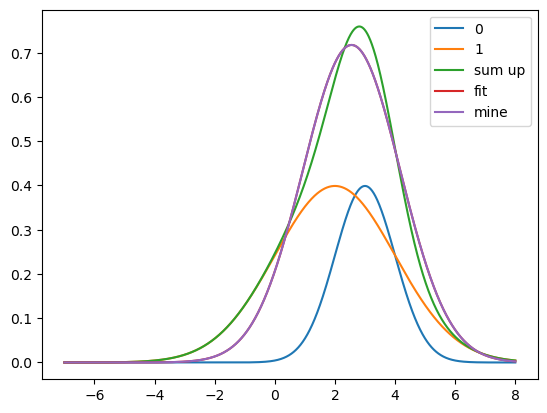

In [24]:

num=2
c=[]
wave_list=np.linspace(-7,8,2000)
for i in range(num):
    c.append(models.Gaussian1D(amplitude=test_A[i]/sqrt(2*pi*test_stddev[i]**2),
                               mean=test_central[i], stddev=test_stddev[i]))
    
total=np.zeros_like(c[0](wave_list))

for i in range(num):
    total+=c[i](wave_list)
    
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()
    
for i in range(num):
    ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")
ax.plot(wave_list,models.Gaussian1D(amplitude=A/sqrt(2*pi*sigma**2), mean=mu, stddev=sigma)(wave_list),label="mine")

ax.legend()
c_fitted

In [31]:
print(sol)

[2.56161638 1.55605626]


# draft

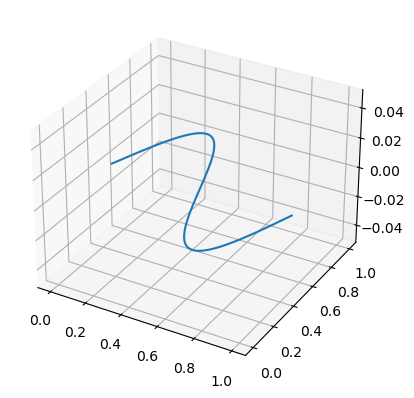

In [26]:

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

